In [ ]:
!pip install openpyxl
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 759.4 kB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd

from collections import namedtuple
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
import textwrap
import seaborn as sns

import scipy.stats
import statsmodels.api as sm
from sklearn.utils import shuffle

import openpyxl
import xlsxwriter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin'

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin


In [ ]:
!unzip "/content/drive/MyDrive/Colab_Notebooks/oai/control_used_for_embedding/Noto_Serif.zip"

Archive:  /content/drive/MyDrive/Colab_Notebooks/oai/control_used_for_embedding/Noto_Serif.zip
replace OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: NotoSerif-Regular.ttf   
replace NotoSerif-Italic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace NotoSerif-Bold.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace NotoSerif-BoldItalic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!mv NotoSerif-Regular.ttf /usr/share/fonts/truetype/

In [ ]:
path_to_font='/usr/share/fonts/truetype/NotoSerif-Regular.ttf'
fontprop = fm.FontProperties(fname=path_to_font, size=15)

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

In [ ]:
matched_tkr = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/better_TKR_match_TSNE/multivariate_partial_results/rand_state_tkr_matched_IDs_PC_modes.csv')

matched_tkr

,distance,id,side,pred_kl,KL,oa_prog,total_or_partial,tkr,hisp,race,...,lat_pc1,lat_pc2,lat_pc3,lat_pc4,lat_pc5,lat_pc6,lat_pc7,lat_pc8,lat_pc9,lat_pc10
0,1.304663,9002430,RIGHT,2.0,1,1,2.0,1,0.0,1.0,...,109.409656,-9.388965,42.281140,3.152689,-42.528088,-21.976658,40.686990,9.903395,1.933508,-4.084148
1,1.182410,9014797,RIGHT,1.0,0,1,1.0,1,0.0,1.0,...,59.554966,58.444102,31.743915,-19.490828,12.241997,23.063323,-24.882109,12.925595,-2.407582,13.014131
2,0.904961,9015363,RIGHT,3.0,1,1,1.0,1,0.0,1.0,...,54.242308,17.057340,59.973812,29.870085,-67.143286,28.937944,-58.588115,-29.104994,4.099799,3.315581
3,1.548339,9028418,RIGHT,2.0,1,1,1.0,1,0.0,1.0,...,13.703452,10.629125,-111.134082,-77.171756,-33.185865,82.860786,-17.173073,-22.246087,27.601066,12.040012
4,1.082185,9030718,RIGHT,3.0,1,1,1.0,1,0.0,1.0,...,-47.532697,62.167547,46.886178,-8.586910,-2.903431,-7.565298,-47.733115,26.963397,10.232695,-0.175096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.922849,9197466,RIGHT,1.0,0,1,0.0,0,0.0,1.0,...,99.310390,-13.336018,-7.842970,-1.554898,14.572658,5.078923,5.496018,2.894987,-2.832638,2.063018
502,3.169946,9221040,RIGHT,0.0,0,0,0.0,0,0.0,2.0,...,36.522769,85.001155,9.272741,-24.959886,-21.473879,-19.103750,-9.785086,22.987121,11.133159,6.791374
503,0.979716,9860356,RIGHT,3.0,1,1,0.0,0,0.0,1.0,...,59.764947,-53.800543,-18.051530,15.914843,-10.410275,47.862717,7.082022,-25.020104,2.956562,-3.140261
504,0.776750,9666974,RIGHT,1.0,0,0,0.0,0,0.0,1.0,...,12.166891,75.432141,-27.589754,-6.308834,-2.237189,-8.593273,-31.936101,10.422632,9.119521,-1.320420


In [ ]:
raw_coef = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/better_TKR_match_TSNE/multivariate_partial_results/TKR/TKR_bootstrap_elasticNet_coef_raw.csv'

conf_int_coef = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/better_TKR_match_TSNE/multivariate_partial_results/TKR/TKR_bootstrap_elasticNet_coef_confidence_intervals.csv'

sel_freq = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/better_TKR_match_TSNE/multivariate_partial_results/TKR/TKR_bootstrap_elasticNet_feature_selection_frequencies.csv'

bootstrap_tkr = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/better_TKR_match_TSNE/multivariate_partial_results/TKR/bootstrap_checkpoint.pkl'

In [ ]:
raw_coef_df = pd.read_csv(raw_coef)
raw_coef_df

,Unnamed: 0,const,hisp,race,gender,Tenderness,Injury_history,Mild_symptoms,Heberden,Crepitus,...,lat_pc1,lat_pc2,lat_pc3,lat_pc4,lat_pc5,lat_pc6,lat_pc7,lat_pc8,lat_pc9,lat_pc10
0,0,0.0,0.0,-0.963223,0.0,0.435867,0.000000,0.00000,0.000000,-0.146232,...,0.004951,0.000000,-0.003408,0.018054,0.007949,0.000000,0.000000,-0.006794,0.005282,-0.012536
1,1,0.0,0.0,-0.676627,0.0,0.524331,0.275346,0.00000,0.000000,-0.183720,...,-0.005003,0.000000,0.005371,0.021922,0.000255,0.012890,-0.011808,0.016031,-0.013588,-0.027751
2,2,0.0,0.0,-0.180713,0.0,0.000000,-0.118184,0.00000,0.000000,-0.409059,...,-0.014019,-0.009245,0.003857,0.018579,-0.004270,0.024422,-0.024151,-0.016241,0.000000,0.059802
3,3,0.0,0.0,-0.427901,0.0,0.000000,0.000000,0.00000,0.000000,-0.503790,...,-0.013004,0.020299,0.013149,0.005412,0.005055,0.015486,0.000000,0.000000,0.013044,0.000000
4,4,0.0,0.0,-0.776239,0.0,0.000000,0.000000,0.00000,-0.719088,0.000000,...,0.012251,-0.007785,-0.010487,0.032490,0.010004,0.000000,0.017825,0.000000,0.012666,-0.057517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.0,0.0,-0.350635,0.0,0.358635,-0.467170,0.00000,-0.477969,0.000000,...,-0.004761,-0.009639,-0.009112,0.006184,0.002974,0.006423,0.000000,-0.022391,0.000000,-0.018466
996,996,0.0,0.0,-0.591769,0.0,0.000000,0.000000,0.00000,0.000000,-0.225334,...,-0.002428,-0.008372,0.000000,0.021535,0.011592,0.004363,-0.019176,-0.006980,0.000000,0.000000
997,997,0.0,0.0,0.000000,0.0,0.302438,0.000000,0.00000,-0.099715,0.000000,...,-0.009765,0.000000,-0.013043,0.013211,-0.012385,0.005715,-0.020835,-0.048222,0.013364,-0.027115
998,998,0.0,0.0,-0.535807,0.0,0.000000,0.000000,0.00000,0.000000,-0.053819,...,-0.006936,-0.002220,-0.007396,0.017349,0.000000,0.007373,0.000000,-0.022027,0.012133,-0.003321


In [ ]:
sel_freq_df = pd.read_csv(sel_freq)
sel_freq_df

,Unnamed: 0,Selection Frequency
0,hisp,0.000
1,race,0.790
2,gender,0.002
3,Tenderness,0.174
4,Injury_history,0.170
...,...,...
120,lat_pc7,0.735
121,lat_pc8,0.811
122,lat_pc9,0.791
123,lat_pc10,0.797


# **evaluating variable importance**

In [ ]:
# raw_coef_df is dataframe with coefficients from each iteration
# df_freq is dataframe with selection frequencies

# Calculate the mean and standard deviation for each coefficient across the 1000 iterations.
means = raw_coef_df.mean()
std_devs = raw_coef_df.std()

# Calculate the 95% and 99% confidence intervals for each coefficient.
ci_95 = {}
ci_99 = {}
for col in raw_coef_df.columns:
    ci_95[col] = scipy.stats.norm.interval(0.95, loc=means[col], scale=std_devs[col]/np.sqrt(len(raw_coef_df)))
    ci_99[col] = scipy.stats.norm.interval(0.99, loc=means[col], scale=std_devs[col]/np.sqrt(len(raw_coef_df)))

# Create a DataFrame for the selection frequency.
df_selection_freq = pd.DataFrame({'variable': sel_freq_df['Unnamed: 0'], 'selection_frequency': sel_freq_df['Selection Frequency']})

# Merge the selection frequency DataFrame with the average coefficients and confidence intervals.
df_summary = pd.DataFrame(means, columns=['mean_coef'])
df_summary['std_dev'] = std_devs
df_summary['ci_95_lower'], df_summary['ci_95_upper'] = zip(*ci_95.values())
df_summary['ci_99_lower'], df_summary['ci_99_upper'] = zip(*ci_99.values())
df_summary = df_summary.merge(df_selection_freq, left_index=True, right_on='variable')

# Assuming a variable is included in the CI if the CI does not cross 0
df_summary['included_in_95'] = (df_summary['ci_95_lower'] * df_summary['ci_95_upper']) > 0
df_summary['included_in_99'] = (df_summary['ci_95_lower'] * df_summary['ci_95_upper']) > 0 # Update with actual 99% CI if available

# Add a column to indicate whether the confidence interval includes zero
df_summary['ci_includes_zero'] = (df_summary['ci_95_lower'] <= 0) & (df_summary['ci_95_upper'] >= 0)

# Effect Size and Confidence Interval Width
df_summary['ci_width'] = df_summary['ci_95_upper'] - df_summary['ci_95_lower']

# Calculate the error bars based on the confidence interval width
df_summary['error'] = (df_summary['ci_95_upper'] - df_summary['ci_95_lower']) / 2

# Adjusting the calculation of weighted importance using absolute values
df_summary['abs_mean_coef'] = df_summary['mean_coef'].abs()
df_summary['weighted_importance'] = df_summary['abs_mean_coef'] * df_summary['selection_frequency']

# Ranking Variables
df_summary['rank'] = df_summary['weighted_importance'].rank(ascending=False)

# Display the summary DataFrame.
# df_summary

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [ ]:
# defining the updated renaming function with edge case handling.

def rename_variable(var):
    prefix_mapping = {
        'bs': 'Bone Shape',
        'thick': 'Cartilage Thickness',
        't2': 'Cartilage T2',
        'med': 'Medial Meniscus Shape',
        'lat': 'Lateral Meniscus Shape'
    }
    body_part_mapping = {
        'fem': 'Femur',
        'tib': 'Tibia',
        'pat': 'Patella'
    }

    # Special cases for 'koos_' prefix, '_qol' suffix, and 'BMI'
    if var == 'koos_qol':
        return 'KOOS QOL'
    if var =='gender':
        return 'Sex'
    elif var.startswith('koos_'):
        return 'KOOS ' + var.split('_')[1].capitalize()
    elif var.endswith('_qol'):
        return ' '.join(var.split('_')[:-1]).capitalize() + ' QOL'
    elif var == 'BMI':
        return 'BMI'
    # Check if the variable starts with known prefixes
    elif any(var.startswith(prefix) for prefix in prefix_mapping):
        # Split the variable name by '_'
        parts = var.split('_')
        # Replace specific substrings according to the mappings
        name_parts = [prefix_mapping.get(parts[0], parts[0])] + [body_part_mapping.get(part, part) for part in parts[1:]]
        # Replace 'pc' with 'PC ' and add the number
        name_parts = [part if not part.startswith('pc') else 'PC ' + part[2:] for part in name_parts]
    else:
        # For edge cases, capitalize each part and join with space
        name_parts = [part.capitalize() for part in var.split('_')]

    # Join the parts with spaces and return the new name
    return ' '.join(name_parts)

# Apply the renaming function to the 'variable' column
df_summary['formatted_variable'] = df_summary['variable'].apply(rename_variable)



In [ ]:
# df_summary.to_excel('/content/drive/MyDrive/Colab_Notebooks/oai/tkr_robust_bootstrap_df.xlsx', index=False)

# check = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/oai/tkr_robust_bootstrap_df.xlsx')

# check

# **Visualizing Top 20 Features from bootstrap models**

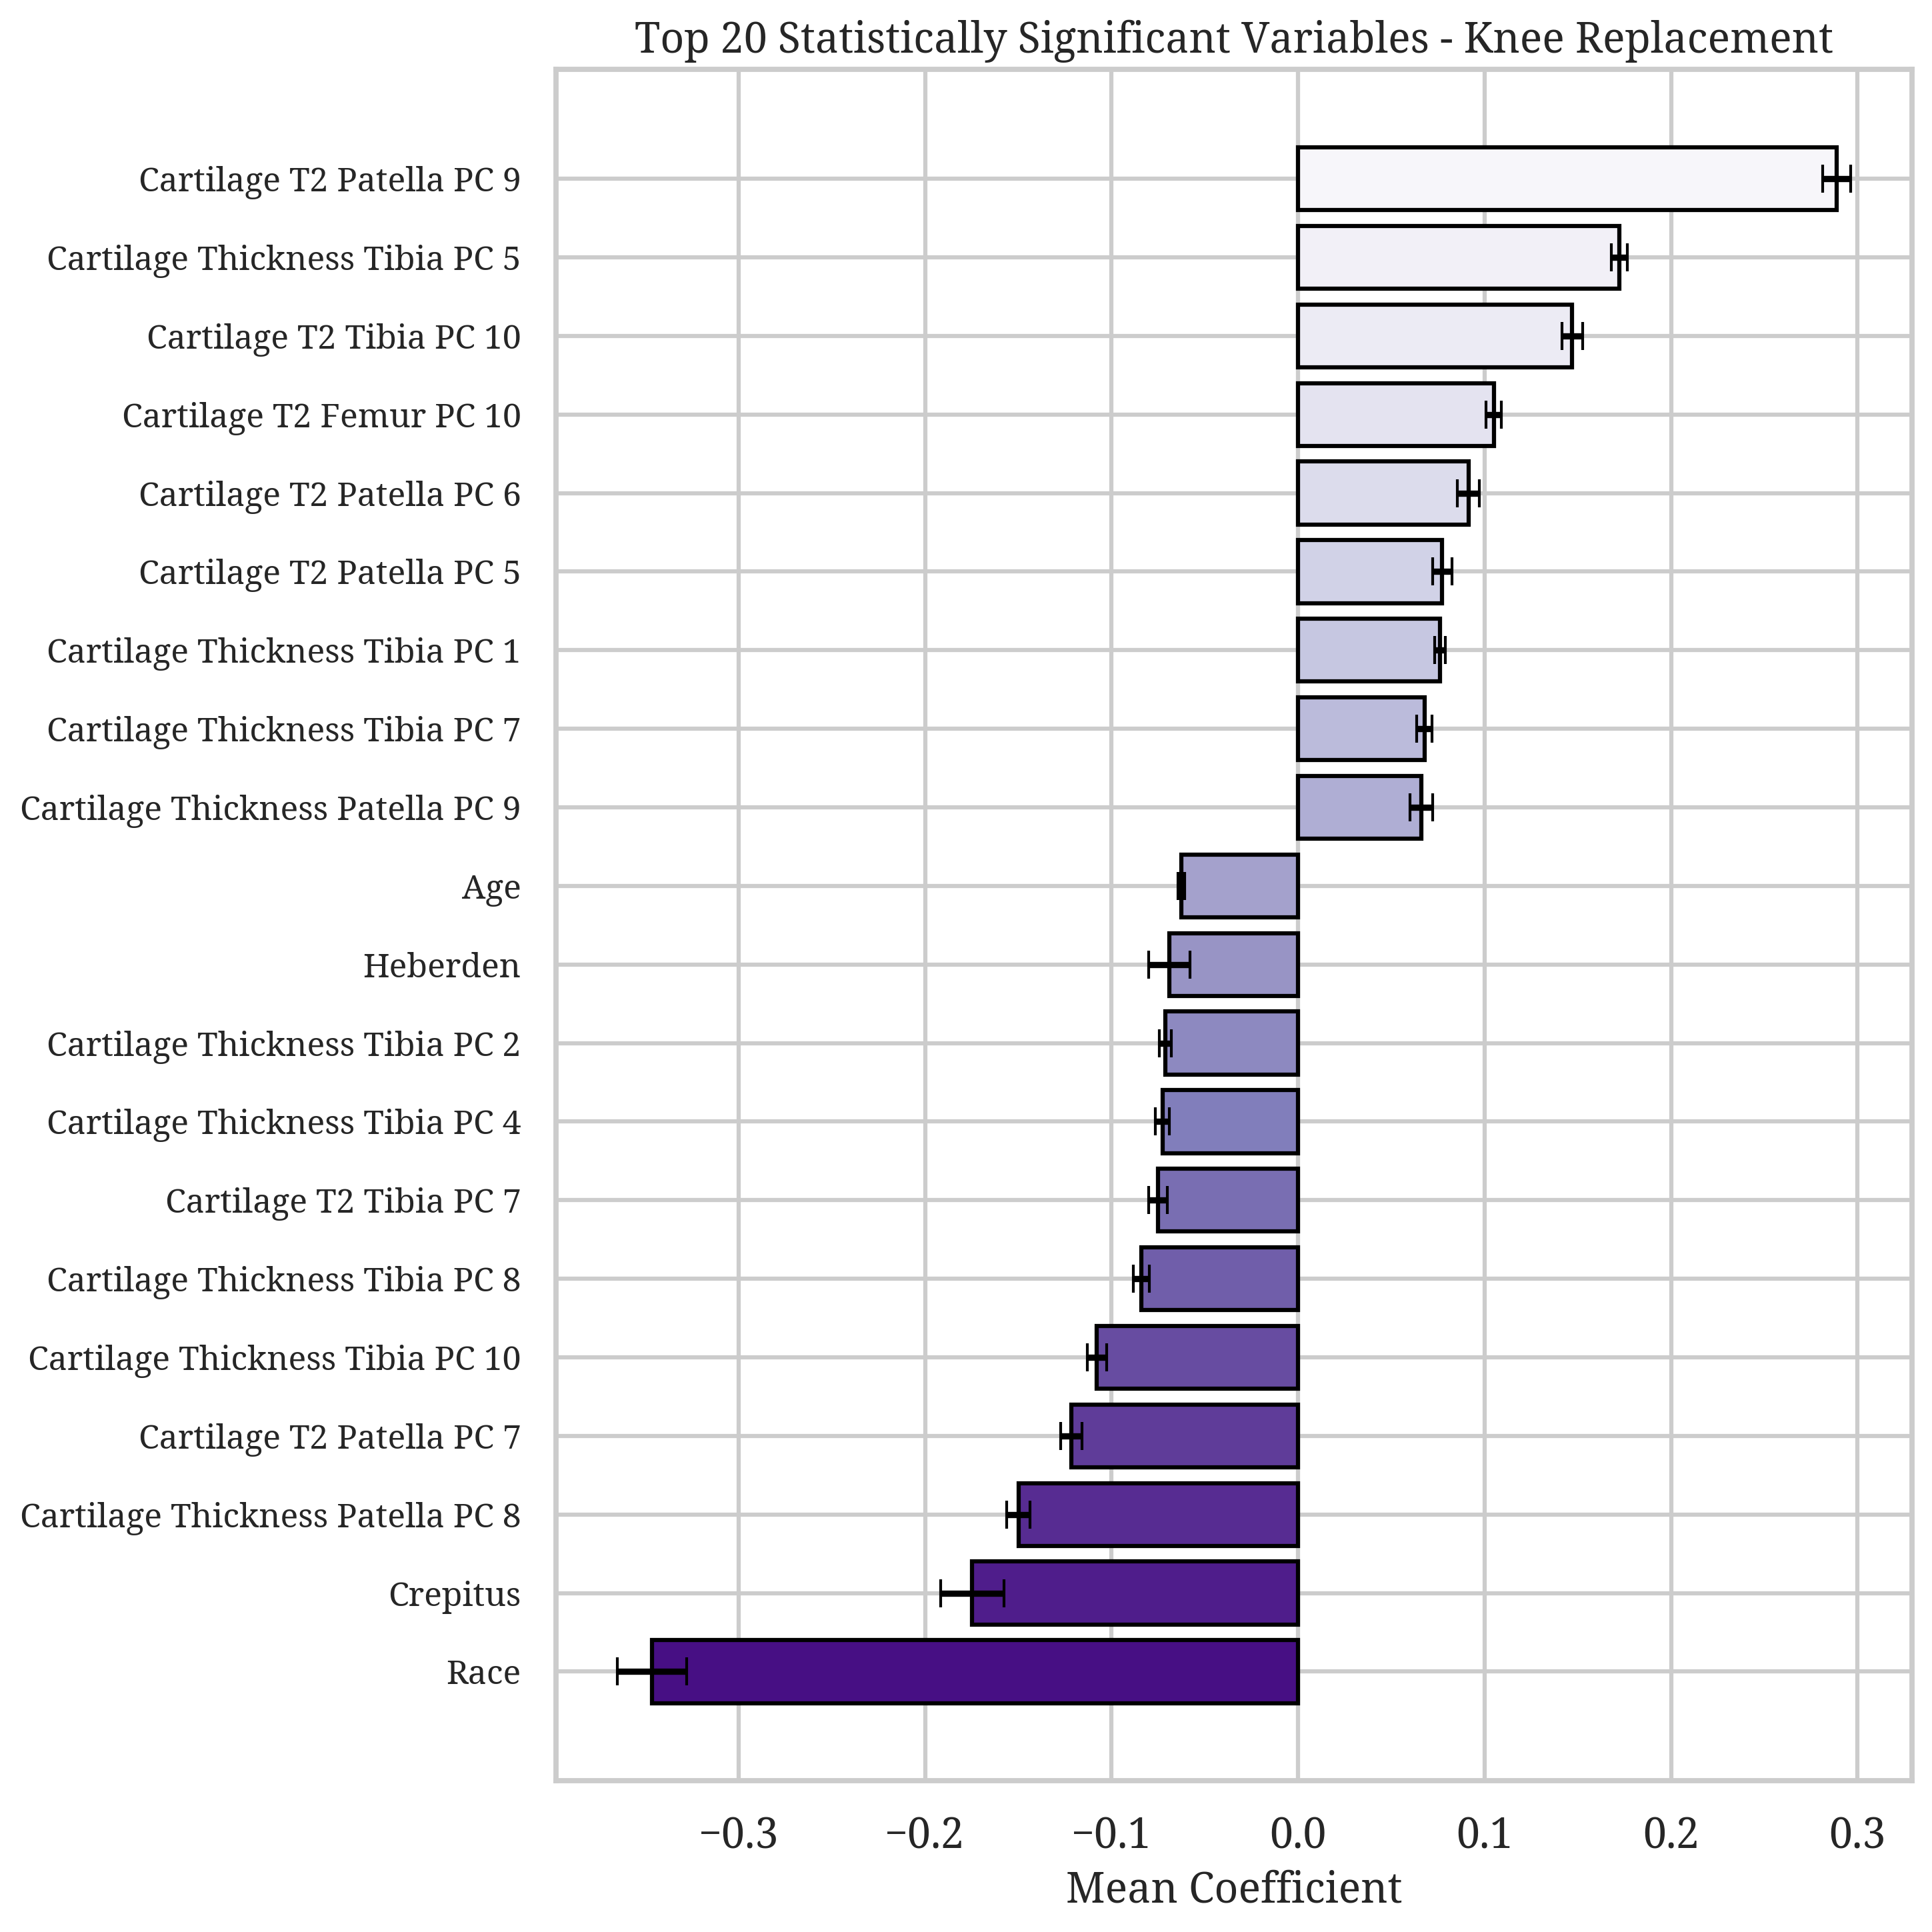

In [ ]:
# Set the number of variables you want to display
top_n = 20  # Adjust the number of top variables you want to show

# Sort by the abs_mean_coef from most positive to most negative for the top N significant coefficients
# Within the top N, sort from positive to negative mean_coef
significant_vars_top_n = df_summary[df_summary['ci_includes_zero'] == False].nlargest(top_n, 'abs_mean_coef')
significant_vars_top_n_sorted = significant_vars_top_n.sort_values(by='mean_coef', ascending=False)

# Apply the renaming function to the 'variable' column
significant_vars_top_n_sorted['formatted_variable'] = significant_vars_top_n_sorted['variable'].apply(rename_variable)

# Generate the color palette
cmap = sns.color_palette("Purples", n_colors=top_n)

# Plotting only the top N statistically significant variables using a horizontal bar plot with error bars
plt.figure(figsize=(10, 10), dpi=300)  # Adjust size as needed to make bars visible and readable

sns.set_context("talk")
sns.set_style("whitegrid")

barplot = plt.barh(significant_vars_top_n_sorted['formatted_variable'], significant_vars_top_n_sorted['mean_coef'],
                   xerr=(significant_vars_top_n_sorted['ci_95_upper'] - significant_vars_top_n_sorted['ci_95_lower']) / 2,
                   capsize=5, color=cmap, align='center', edgecolor='black')

# Set the font properties for both x and y-tick labels
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop, fontsize=12)

plt.xlabel('Mean Coefficient', fontproperties=fontprop)
plt.ylabel('')

plt.title('Top 20 Statistically Significant Variables - Knee Replacement', fontproperties=fontprop)
plt.gca().invert_yaxis()  # Invert y-axis to have the largest positive coefficients at the top

plt.tight_layout()  # Adjust the layout

# save_path = '/content/drive/MyDrive/Colab_Notebooks/oai/figures/tkr_top20_barplot_significant_values.svg'
# plt.savefig(save_path, format='svg', bbox_inches='tight')

plt.show()

# **Selection Threshold for Important Features**

In [ ]:
# Select the top 25% of features based on weighted importance

# Calculate the threshold for the top 25%
quantile_threshold = df_summary['weighted_importance'].quantile(0.75)

# Filter features that meet the threshold
important_features = df_summary[df_summary['weighted_importance'] >= quantile_threshold]

# Extract the names of these important features
selected_feature_names = important_features['variable'].tolist()

selected_feature_names

['race',
 'Crepitus',
 'age',
 'koos_symptom',
 'bs_tib_pc9',
 't2_fem_pc2',
 't2_fem_pc5',
 't2_fem_pc10',
 't2_pat_pc1',
 't2_pat_pc5',
 't2_pat_pc6',
 't2_pat_pc7',
 't2_pat_pc9',
 't2_pat_pc10',
 't2_tib_pc2',
 't2_tib_pc7',
 't2_tib_pc8',
 't2_tib_pc10',
 'thick_fem_pc2',
 'thick_fem_pc9',
 'thick_pat_pc3',
 'thick_pat_pc7',
 'thick_pat_pc8',
 'thick_pat_pc9',
 'thick_tib_pc1',
 'thick_tib_pc2',
 'thick_tib_pc3',
 'thick_tib_pc4',
 'thick_tib_pc5',
 'thick_tib_pc7',
 'thick_tib_pc8',
 'thick_tib_pc10']

**Add back in demographic covariates not automatically selected**

In [ ]:
covs = ['gender', 'BMI']
selected_feature_names.extend(covs)

In [ ]:
selected_feature_names

['race',
 'Crepitus',
 'age',
 'koos_symptom',
 'bs_tib_pc9',
 't2_fem_pc2',
 't2_fem_pc5',
 't2_fem_pc10',
 't2_pat_pc1',
 't2_pat_pc5',
 't2_pat_pc6',
 't2_pat_pc7',
 't2_pat_pc9',
 't2_pat_pc10',
 't2_tib_pc2',
 't2_tib_pc7',
 't2_tib_pc8',
 't2_tib_pc10',
 'thick_fem_pc2',
 'thick_fem_pc9',
 'thick_pat_pc3',
 'thick_pat_pc7',
 'thick_pat_pc8',
 'thick_pat_pc9',
 'thick_tib_pc1',
 'thick_tib_pc2',
 'thick_tib_pc3',
 'thick_tib_pc4',
 'thick_tib_pc5',
 'thick_tib_pc7',
 'thick_tib_pc8',
 'thick_tib_pc10',
 'gender',
 'BMI']

# **Prepare data for multivariate regression**

**Remove Confounders**

In [ ]:
def filter_covariates(dataframe, target, confounders, slice_start):
    """
    Filters a DataFrame to include specific covariates based on the provided target and confounders.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to be filtered.
    target (str): The name of the target variable.
    confounders (list): A list of column names to be excluded as confounders.

    Returns:
    pd.DataFrame: A DataFrame filtered to include the desired covariates.
    """
    # Extracting covariates (excluding the columns specified in confounders)
    # and including the target variable
    covariates = [col for col in dataframe.columns[slice_start:] if col not in confounders] + [target]

    # Creating a new DataFrame with the selected covariates
    filtered_df = dataframe[covariates]

    return filtered_df

# Example usage - correlated variables to remove
confounders = ['height', 'weight', 'womac_pain', 'womac_adl', 'womac_stiff', 'womac_total']
target = 'tkr'

df_tkr = filter_covariates(matched_tkr, target, confounders, slice_start=8)
df_tkr

,hisp,race,gender,Tenderness,Injury_history,Mild_symptoms,Heberden,Crepitus,Morning_stiffness,age,...,lat_pc2,lat_pc3,lat_pc4,lat_pc5,lat_pc6,lat_pc7,lat_pc8,lat_pc9,lat_pc10,tkr
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,68.0,...,-9.388965,42.281140,3.152689,-42.528088,-21.976658,40.686990,9.903395,1.933508,-4.084148,1
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,...,58.444102,31.743915,-19.490828,12.241997,23.063323,-24.882109,12.925595,-2.407582,13.014131,1
2,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,64.0,...,17.057340,59.973812,29.870085,-67.143286,28.937944,-58.588115,-29.104994,4.099799,3.315581,1
3,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,64.0,...,10.629125,-111.134082,-77.171756,-33.185865,82.860786,-17.173073,-22.246087,27.601066,12.040012,1
4,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,76.0,...,62.167547,46.886178,-8.586910,-2.903431,-7.565298,-47.733115,26.963397,10.232695,-0.175096,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,77.0,...,-13.336018,-7.842970,-1.554898,14.572658,5.078923,5.496018,2.894987,-2.832638,2.063018,0
502,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,63.0,...,85.001155,9.272741,-24.959886,-21.473879,-19.103750,-9.785086,22.987121,11.133159,6.791374,0
503,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,71.0,...,-53.800543,-18.051530,15.914843,-10.410275,47.862717,7.082022,-25.020104,2.956562,-3.140261,0
504,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,73.0,...,75.432141,-27.589754,-6.308834,-2.237189,-8.593273,-31.936101,10.422632,9.119521,-1.320420,0


In [ ]:
# shuffle the Control and Knee Replacement groups
df_shuffled_tkr = shuffle(df_tkr, random_state=42)

# Split into predictors and outcome
X = df_shuffled_tkr.drop('tkr', axis=1)
y = df_shuffled_tkr['tkr']

# Filter for selected features only:
X_selected = X[selected_feature_names]

In [ ]:
# Add a constant to the model (intercept)
X_selected_with_const = sm.add_constant(X_selected)

# Fit the GLM model with a binomial family
glm_logit_model = sm.GLM(y, X_selected_with_const, family=sm.families.Binomial()).fit()

# View the summary of the model
print(glm_logit_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    tkr   No. Observations:                  506
Model:                            GLM   Df Residuals:                      471
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -261.54
Date:                Thu, 25 Jan 2024   Deviance:                       523.08
Time:                        04:41:35   Pearson chi2:                     569.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2971
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3990      1.461      0.

In [ ]:
print(glm_logit_model.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            593.0784  
Link Function:      Logit            BIC:            -2409.6204
Dependent Variable: tkr              Log-Likelihood: -261.54   
Date:               2024-01-25 04:41 LL-Null:        -350.73   
No. Observations:   506              Deviance:       523.08    
Df Model:           34               Pearson chi2:   569.      
Df Residuals:       471              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const            0.3990   1.4609  0.2731 0.7848 -2.4644  3.2623
race            -0.5253   0.2758 -1.9048 0.0568 -1.0659  0.0152
Crepitus        -0.1555   0.2462 -0.6318 0.5275 -0.6380  0.3269
age             -0.0277   0.0151 -1.8337 0.0667 -0.0573

In [ ]:
# Save statsmodel summary reports:

# Get the summary of the model
model_summary = glm_logit_model.summary()

# Convert the summary to a string
model_summary_str = str(model_summary)

# Write the summary to a file
with open('/content/drive/MyDrive/Colab_Notebooks/oai/TKR_logReg_model_summary.txt', 'w') as file:
    file.write(model_summary_str)


# Get the summary of the model
model_summary_v2 = glm_logit_model.summary2()

# Convert the summary to a string
model_summary_str_v2 = str(model_summary_v2)

# Write the summary to a file
with open('/content/drive/MyDrive/Colab_Notebooks/oai/TKR_logReg_model_summary_v2.txt', 'w') as file:
    file.write(model_summary_str_v2)

# Additionally, save AIC, BIC, and other metrics
with open('/content/drive/MyDrive/Colab_Notebooks/oai/TKR_logReg_model_metrics.txt', 'w') as file:
    file.write(f"AIC: {glm_logit_model.aic}\n")
    file.write(f"BIC: {glm_logit_model.bic}\n")
    file.write(f"BIC LLF: {glm_logit_model.bic_llf}\n")
    file.write(f"LLF: {glm_logit_model.llf}\n")
    file.write(f"Pearson chi2: {glm_logit_model.pearson_chi2}\n")
    file.write(f"Pseudo R-squared: {glm_logit_model.pseudo_rsquared(kind='cs')}\n")


# **Results with Odds Ratios**

In [ ]:
# Calculate odds ratios and 95% CI
odds_ratios = np.exp(glm_logit_model.params)
conf_int = np.exp(glm_logit_model.conf_int())
conf_int['Odds Ratio'] = odds_ratios

# Add a column with p-values
conf_int['p-value'] = glm_logit_model.pvalues

# Add a column for Standard Error
conf_int['Std.Err.'] = glm_logit_model.bse

# Add a column for z-values
conf_int['z-value'] = glm_logit_model.params / glm_logit_model.bse

# Rename columns for the CI to be more informative
conf_int.columns = ['CI 2.5%', 'CI 97.5%', 'Odds Ratio', 'p-value', 'Std.Err.', 'z-value']

# print the DataFrame
print(conf_int)

                 CI 2.5%   CI 97.5%  Odds Ratio   p-value  Std.Err.   z-value
const           0.085062  26.110476    1.490308  0.784774  1.460922  0.273103
race            0.344421   1.015334    0.591356  0.056808  0.275798 -1.904788
Crepitus        0.528366   1.386727    0.855979  0.527548  0.246155 -0.631753
age             0.944292   1.001910    0.972675  0.066705  0.015110 -1.833659
koos_symptom    0.999438   1.025333    1.012303  0.060957  0.006526  1.873807
bs_tib_pc9      1.016338   1.059411    1.037651  0.000482  0.010589  3.490446
t2_fem_pc2      0.971097   1.010406    0.990557  0.348607  0.010123 -0.937294
t2_fem_pc5      1.026921   1.102485    1.064033  0.000611  0.018113  3.426617
t2_fem_pc10     1.026071   1.122371    1.073141  0.002038  0.022885  3.084604
t2_pat_pc1      0.971432   1.018190    0.994537  0.647805  0.011993 -0.456813
t2_pat_pc5      0.984332   1.121594    1.050724  0.137340  0.033302  1.485769
t2_pat_pc6      0.961907   1.116540    1.036343  0.347880  0.038

In [ ]:
# conf_int.to_excel('/content/drive/MyDrive/Colab_Notebooks/oai/GLM_TKR_pval_oddsRatio.xlsx')

# check = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/oai/GLM_TKR_pval_oddsRatio.xlsx')

# check

# **Quick Identification of Significant Variables**

In [ ]:
# Extract the coefficients and p-values:
params_shuffled = glm_logit_model.params
pvalues_shuffled = glm_logit_model.pvalues

# Create dataframe that contains variables, coefficients, and p-values
significant_vars_shuffled = pd.DataFrame({'Variable': params_shuffled.index, 'Coefficient': params_shuffled.values, 'P-value': pvalues_shuffled.values})

# Filter only those variables with p-values less than 0.05
significant_vars_shuffled = significant_vars_shuffled[significant_vars_shuffled['P-value'] < 0.05]

print(significant_vars_shuffled)


         Variable  Coefficient   P-value
5      bs_tib_pc9     0.036959  0.000482
7      t2_fem_pc5     0.062066  0.000611
8     t2_fem_pc10     0.070590  0.002038
13     t2_pat_pc9     0.135137  0.005309
16     t2_tib_pc7    -0.116167  0.000618
19  thick_fem_pc2    -0.053327  0.000004
21  thick_pat_pc3     0.059877  0.008692
25  thick_tib_pc1     0.033545  0.000752
26  thick_tib_pc2    -0.062752  0.000046
29  thick_tib_pc5     0.058714  0.014079
31  thick_tib_pc8    -0.069984  0.009397


# **Visualize Significant Variable Distributions**

In [ ]:
def rename_column(col_name):
    prefix_mapping = {
        'bs': 'Bone Shape',
        'thick': 'Cartilage Thickness',
        't2': 'Cartilage T2',
        'med': 'Medial Meniscus Shape',
        'lat': 'Lateral Meniscus Shape',
        'koos': 'KOOS'
    }
    body_part_mapping = {
        'fem': 'Femur',
        'tib': 'Tibia',
        'pat': 'Patella'
    }

    if col_name == 'BMI':
        return 'BMI'
    elif col_name == 'gender':
        return 'Sex'
    elif col_name.endswith('_qol'):
        return ' '.join(col_name.split('_')[:-1]).capitalize() + ' QOL'

    parts = col_name.split('_')
    name_parts = []

    for part in parts:
        if part in prefix_mapping:
            name_parts.append(prefix_mapping[part])
        elif part in body_part_mapping:
            name_parts.append(body_part_mapping[part])
        elif part.startswith('pc'):
            name_parts.append('PC ' + part[2:])
        else:
            name_parts.append(part.capitalize())

    return ' '.join(name_parts)


In [ ]:
def create_histogram(df, target_column, columns_to_plot, path_to_font, title, control_color, treatment_color, treatment_label, save_path=None):

    group_control = matched_tkr[matched_tkr['tkr'] == 0].reset_index(drop=True)
    group_treatment = matched_tkr[matched_tkr['tkr'] == 1].reset_index(drop=True)

    # Font properties
    fontprop = fm.FontProperties(fname=path_to_font, size=20)

    sns.set_context("talk")
    sns.set_style("whitegrid")  # Optionally set a background style

    num_cols = 3  # Adjust based on preference
    num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*9, num_rows*7), dpi=300)
    axes = axes.flatten()

    # Loop through the variables and create a boxplot for each
    for i, col_name in enumerate(columns_to_plot):

        # Extract data without NaN values
        control_data = group_control[col_name].dropna()
        treatment_data = group_treatment[col_name].dropna()

        ax = axes[i]

        # Histograms as subplots
        sns.histplot(control_data, kde=True, color=control_color, label='Control Group', alpha=1, ax=ax, edgecolor="black", linewidth=2)
        sns.histplot(treatment_data, kde=True, color=treatment_color, label='TKR Group', alpha=0.4, ax=ax, edgecolor="black", linewidth=2)

        ax.set_title(col_name, fontproperties=fontprop, pad=20)
        ax.set_xlabel('')
        ax.set_ylabel('')

        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontproperties(fontprop)

        # Renaming the column for title
        renamed_col_name = rename_column(col_name)
        wrapped_title = "\n".join(textwrap.wrap(renamed_col_name, width=33))  # Adjust 'width' as needed
        ax.set_title(wrapped_title, fontproperties=fontprop, pad=20, fontsize=22)


    # Hide any unused subplots
    for j in range(i+1, num_rows*num_cols):
        fig.delaxes(axes[j])

    # Create custom legend handles
    legend_elements = [
        Line2D([0], [0], marker='s', color='w', label='Control',
              markerfacecolor=control_color, markersize=17),
        Line2D([0], [0], marker='s', color='w', label=treatment_label,
              markerfacecolor=treatment_color, markersize=17),
    ]

    # Add the legend to the current axes
    legend = fig.legend(handles=legend_elements, loc='upper right')

    # Now that the legend is created, set the font properties
    plt.setp(legend.get_texts(), fontproperties=fontprop)  # Set legend text properties
    plt.setp(legend.get_title(), fontproperties=fontprop)  # Set legend title properties

    # Increase the top margin in plt.subplots_adjust
    plt.subplots_adjust(top=1.05)

    # Set the overall title and adjust the layout
    plt.suptitle(title, fontsize=25, fontproperties=fontprop, y=0.98)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])

        # Save or show the plot
    if save_path:
        plt.savefig(save_path, format='svg', bbox_inches='tight')
    else:
        plt.show()


In [ ]:
treatment_color = '#B7B3D1'
control_color = '#463D65'  # Darker color for control

# Example usage
create_histogram(matched_tkr,
               target_column='tkr',
               columns_to_plot=significant_vars_shuffled.Variable.tolist(),
               path_to_font='/usr/share/fonts/truetype/NotoSerif-Regular.ttf',
               title="TKR Multivariate Regression - Significant PC Modes Histograms",
               control_color=control_color,
               treatment_color=treatment_color,
               treatment_label= 'TKR',
              #  save_path = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_Signif_PC_modes_Histogram.svg'
)
